In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [2]:
df_encoded = pd.read_csv('Data_Preproc_Encoded.csv')
df_encoded.head()

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,1.619462,6,2,6,0,2,0,10,3.076705,0.492293,11,1,2,0,3
1,1.873982,6,2,6,0,2,0,10,3.385311,0.601900,11,1,2,0,2
2,1.393432,6,2,6,0,2,0,10,3.328931,0.557061,11,1,2,0,3
3,1.412426,2,3,1,0,2,0,10,2.726555,0.381690,11,1,5,0,3
4,1.501699,6,3,6,0,2,0,10,2.952075,0.503254,11,1,5,0,3


In [3]:
df_no_encoded = pd.read_csv('Data_Preproc_NoEncoding.csv')
df_no_encoded.head()

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,15.26,x,g,o,f,e,c,w,16.95,17.09,w,t,g,d,w
1,16.60,x,g,o,f,e,c,w,17.99,18.19,w,t,g,d,u
2,14.07,x,g,o,f,e,c,w,17.80,17.74,w,t,g,d,w
3,14.17,f,h,e,f,e,c,w,15.77,15.98,w,t,p,d,w
4,14.64,x,h,o,f,e,c,w,16.53,17.20,w,t,p,d,w


Replacing p with 1 and e with 0

In [51]:
df_class = pd.read_csv('Labels.csv')
df_class.replace('p', 1, inplace=True)
df_class.replace('e', 0, inplace=True)
df_class

,class
0,1
1,1
2,1
3,1
4,1
...,...
61064,1
61065,1
61066,1
61067,1


In [52]:
count = (df_class == 0).sum().sum()
print(count)

27181


In [10]:
numeric_cols = df_no_encoded.select_dtypes(include=['number']).columns
print(numeric_cols)

Index(['cap-diameter', 'stem-height', 'stem-width'], dtype='object')


In [11]:
discrete_cols = list(set(df_no_encoded.columns) - set(numeric_cols))
discrete_cols

['habitat',
 'cap-shape',
 'stem-color',
 'gill-attachment',
 'gill-spacing',
 'season',
 'does-bruise-or-bleed',
 'gill-color',
 'cap-surface',
 'has-ring',
 'cap-color',
 'ring-type']

/Users/medhahira/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


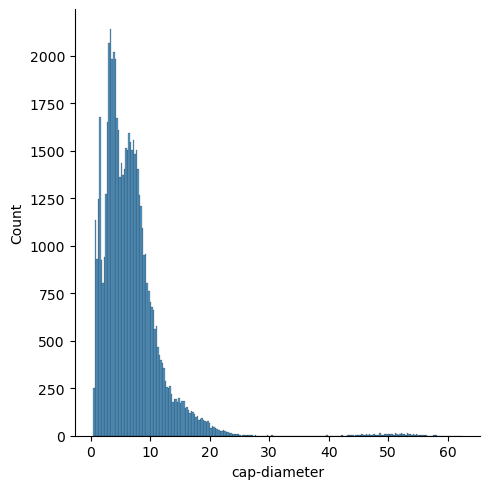

/Users/medhahira/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


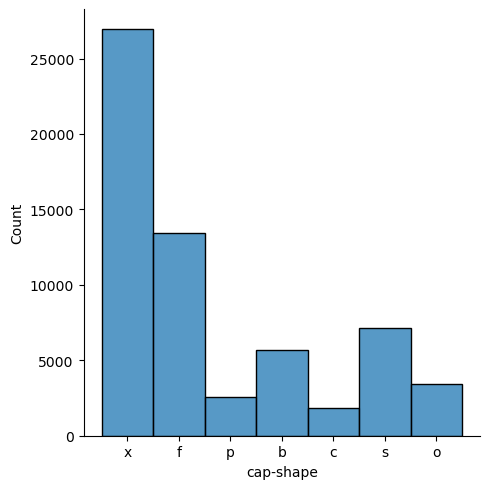

/Users/medhahira/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


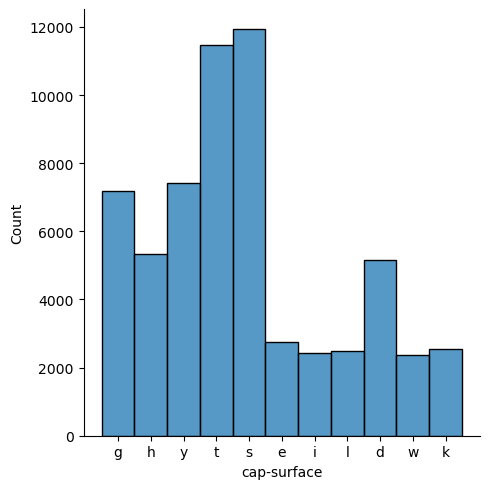

/Users/medhahira/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


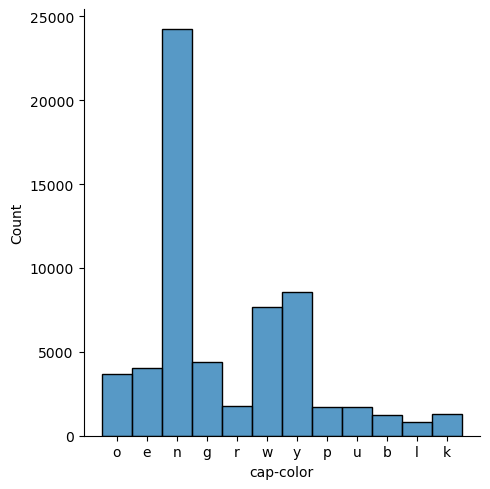

/Users/medhahira/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


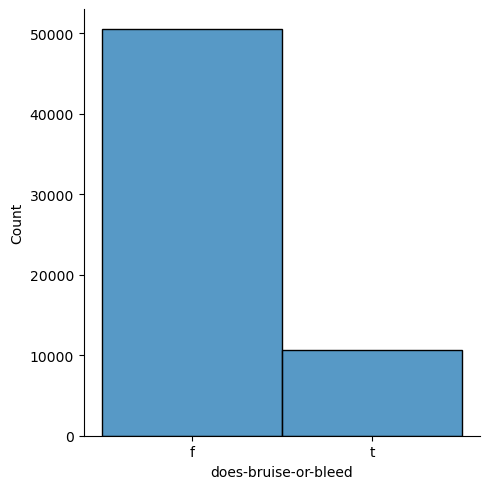

/Users/medhahira/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


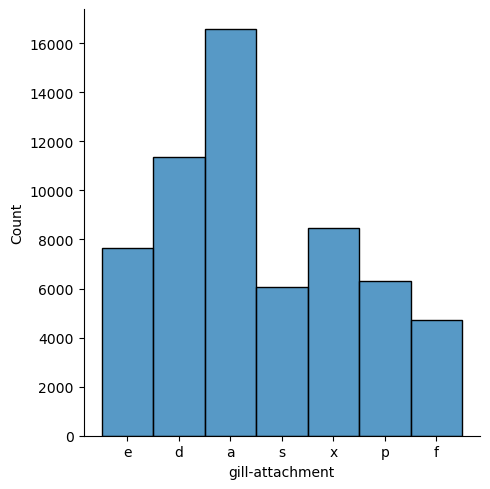

/Users/medhahira/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


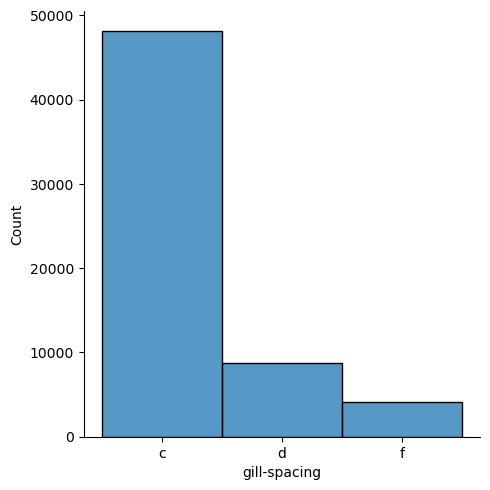

/Users/medhahira/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


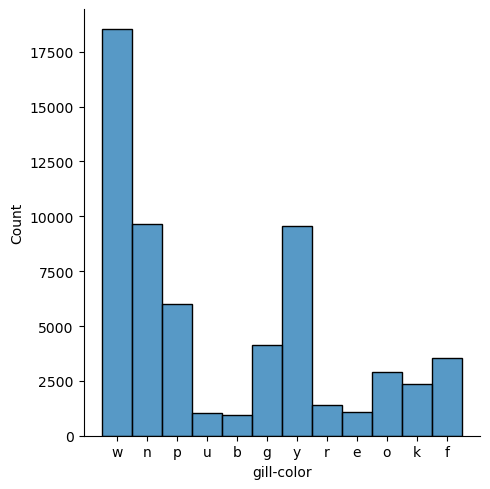

/Users/medhahira/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


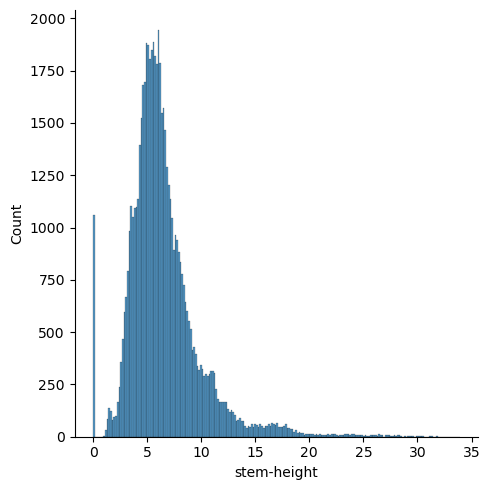

/Users/medhahira/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


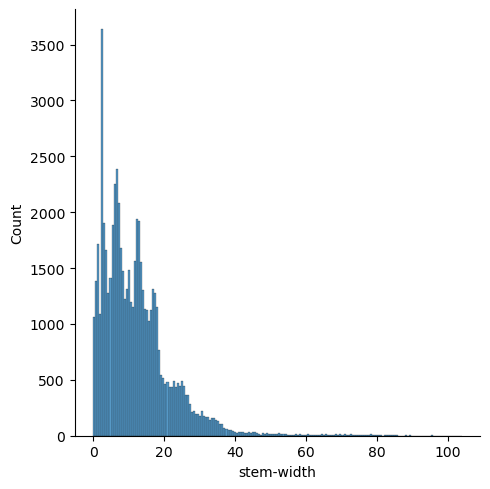

/Users/medhahira/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


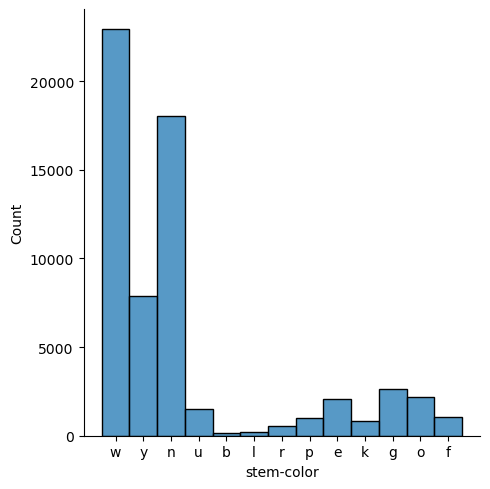

/Users/medhahira/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


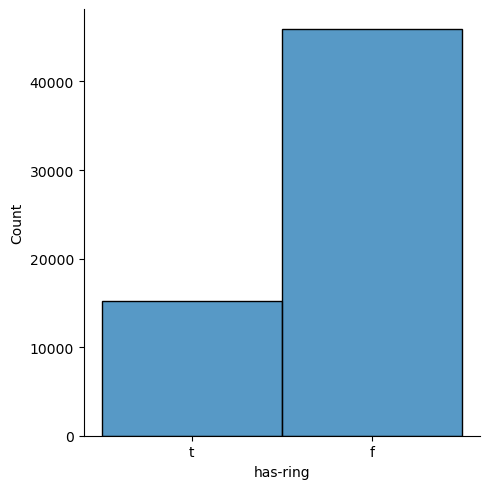

/Users/medhahira/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


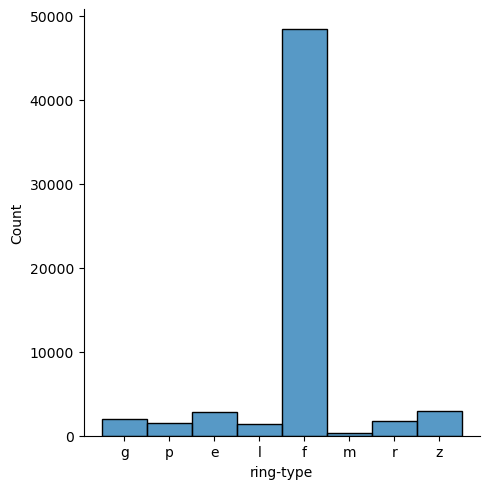

/Users/medhahira/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


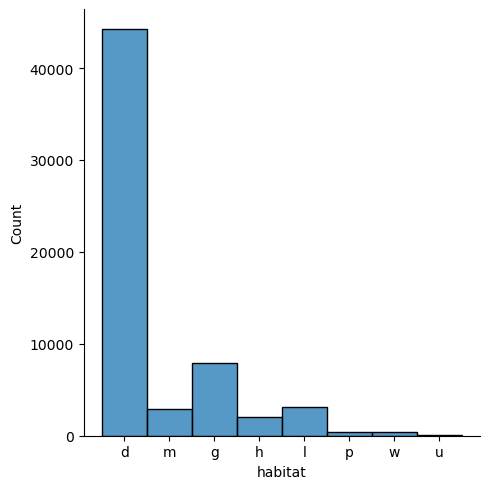

/Users/medhahira/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


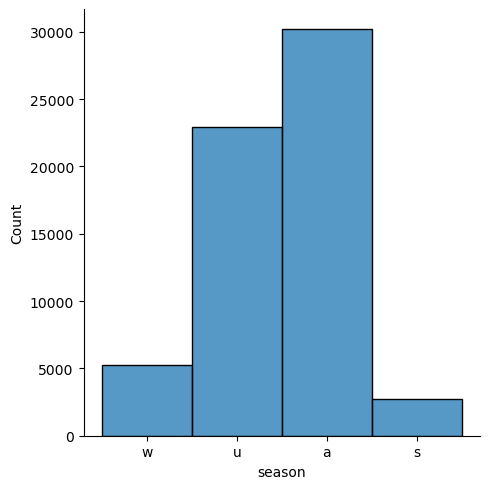

In [4]:
# Plot distribution of each feature
for col in df_no_encoded.columns:
    sns.displot(df_no_encoded[col])
    plt.show()

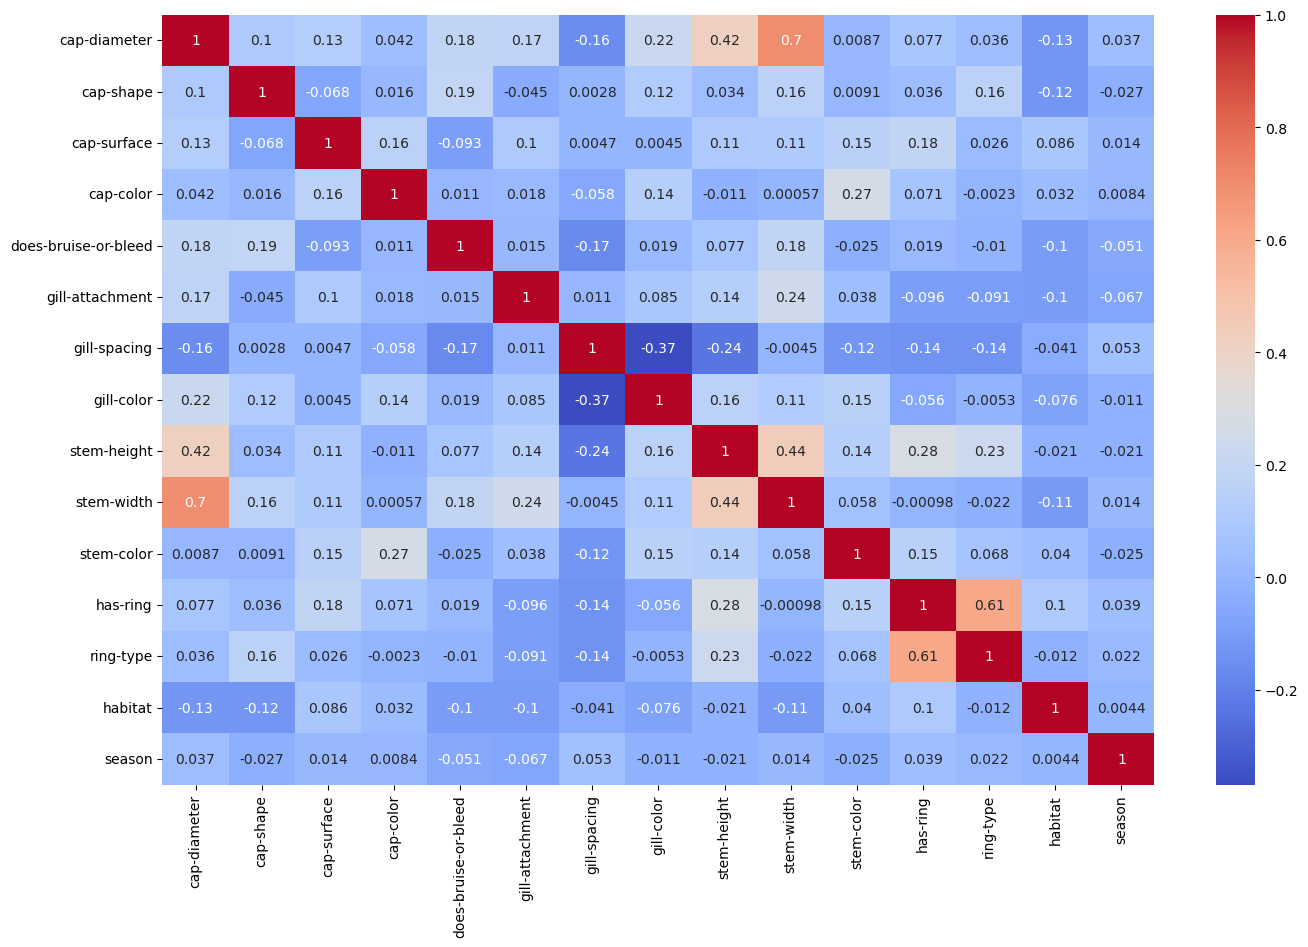

In [5]:
fig = plt.figure(figsize=(16,10))
sns.heatmap(df_encoded.corr(), cmap='coolwarm', annot=True)
plt.show()

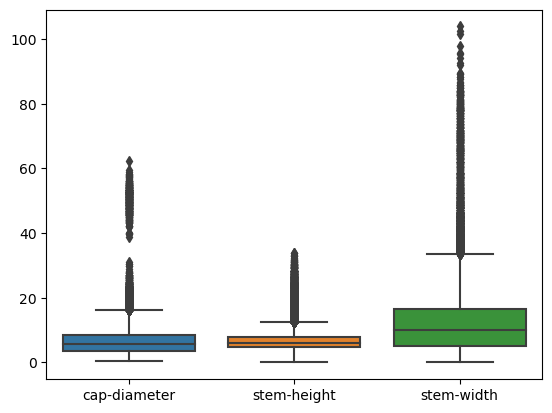

In [6]:
sns.boxplot(data=df_no_encoded)
# Display the plot
plt.show()

This although can be excluded cause these are all discrete features being added in now

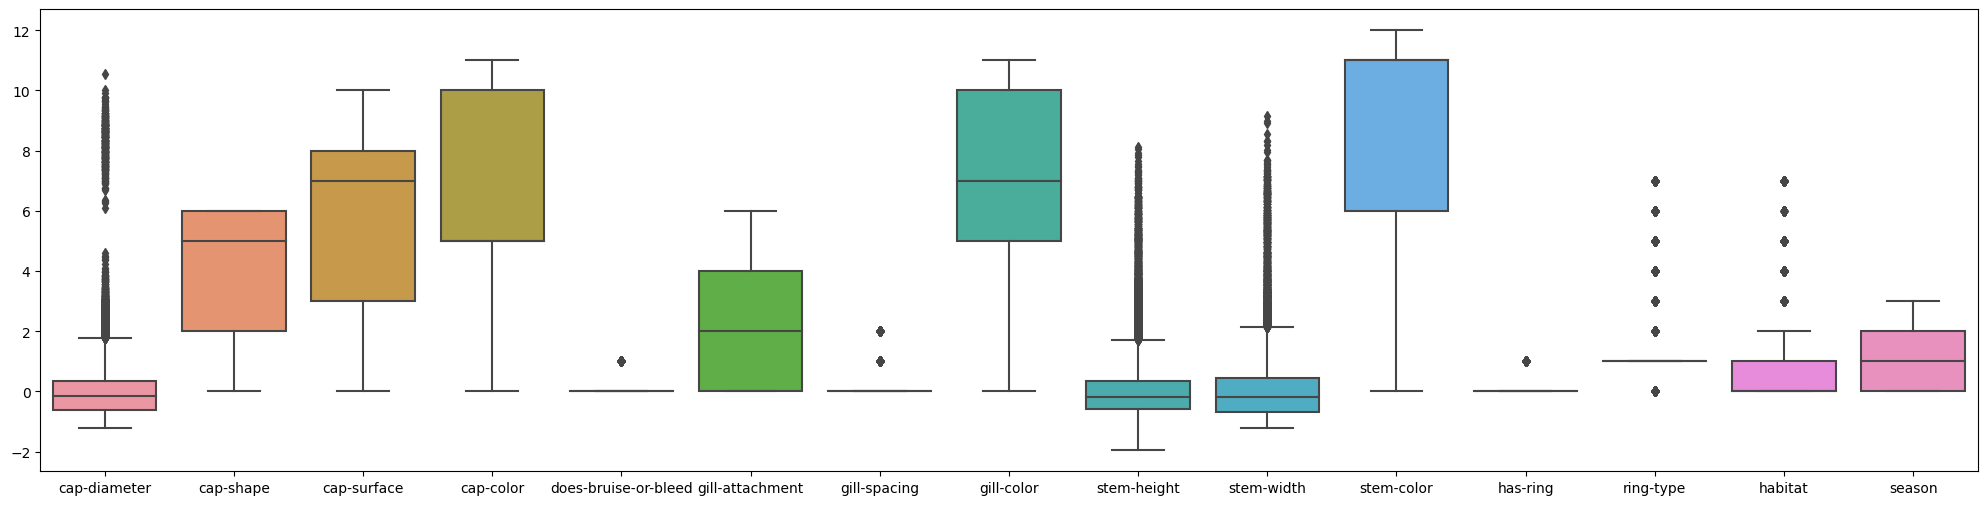

In [12]:
plt.figure(figsize=(25, 6))
sns.boxplot(data=df_encoded)
# Display the plot
plt.show()

In [13]:
def plot_pie_chart(df, column_name):
    # Check if column exists in the DataFrame
    if column_name not in df.columns:
        print(f"The column '{column_name}' does not exist in the DataFrame.")
        return

    # Get unique value counts
    value_counts = df[column_name].value_counts()

    # Plot pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.title(f"Pie Chart for '{column_name}'")
    plt.show()

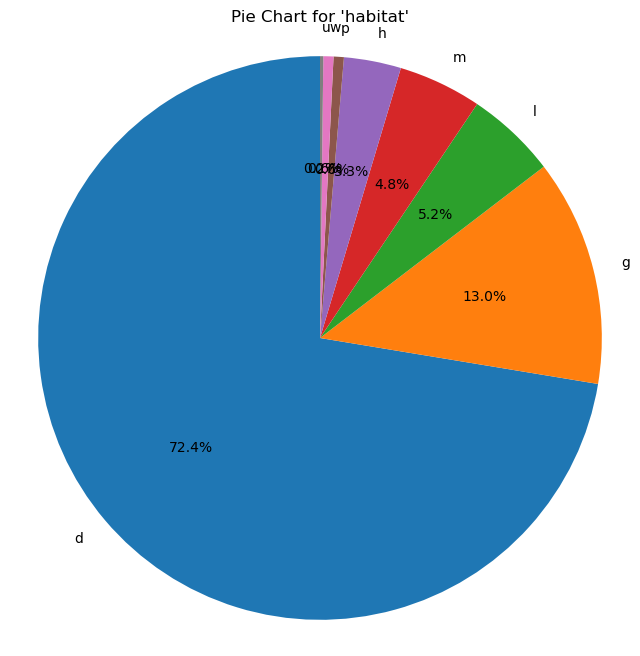

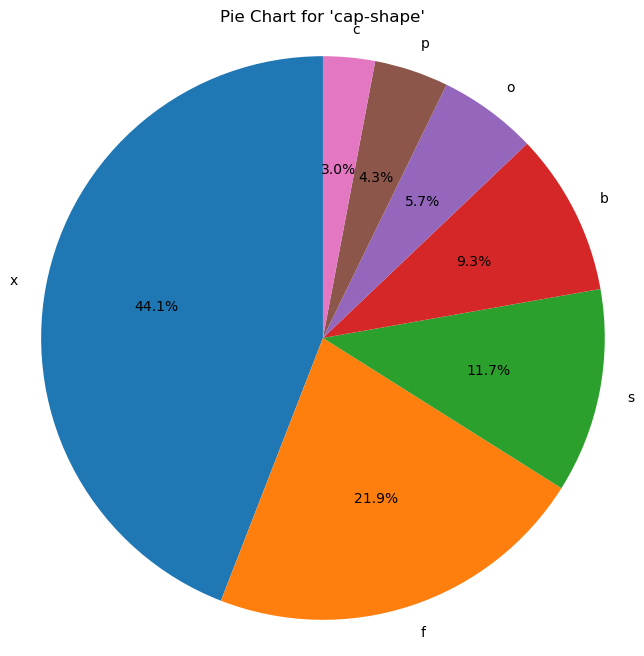

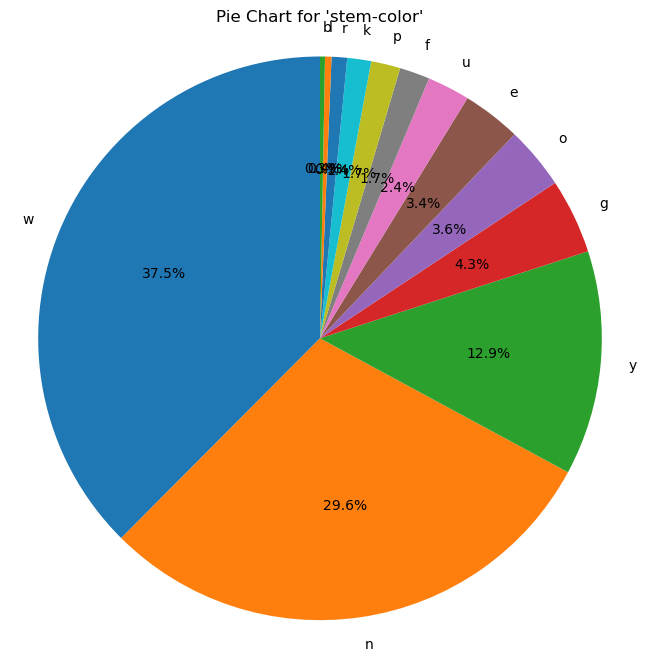

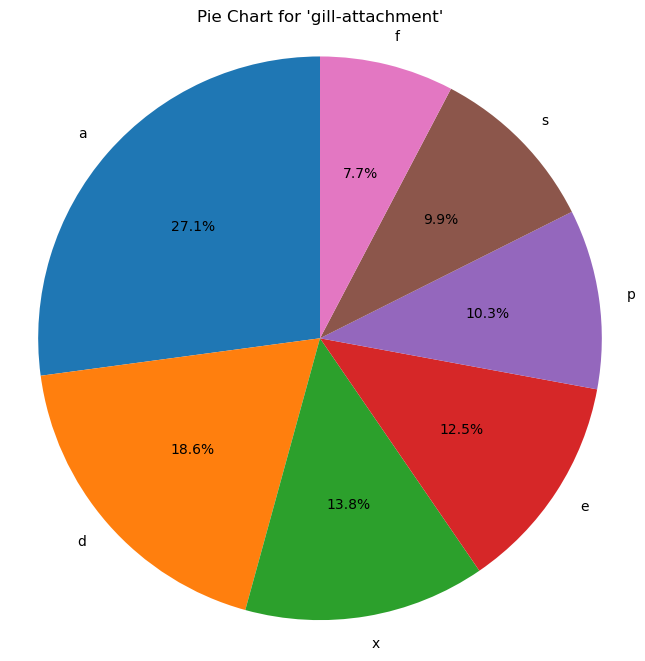

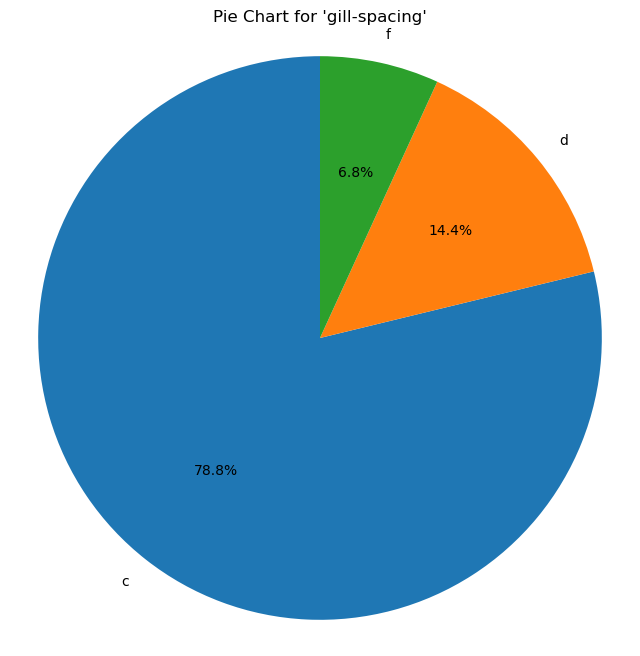

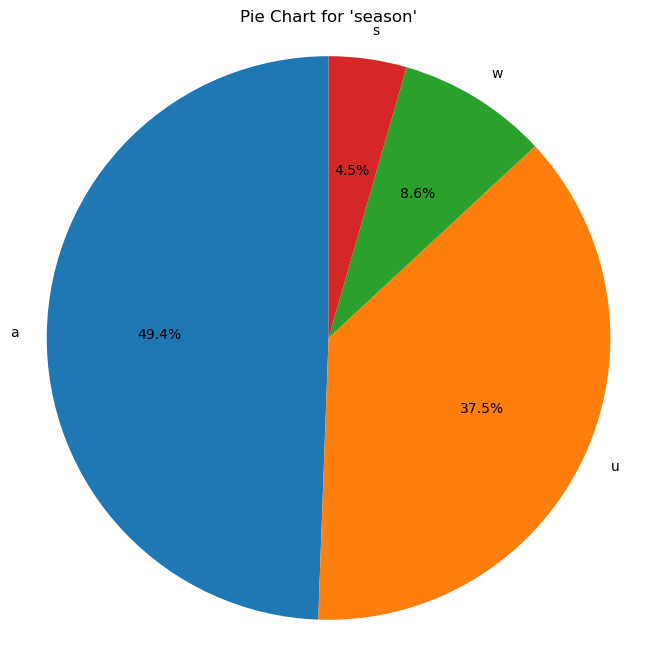

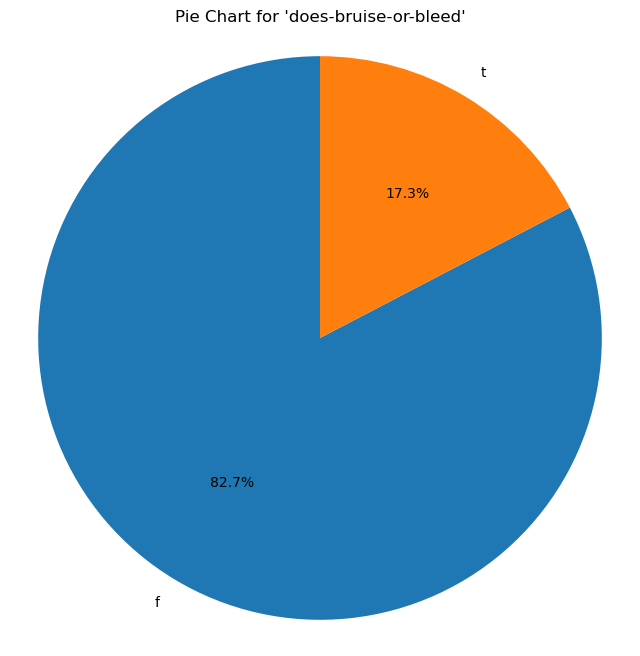

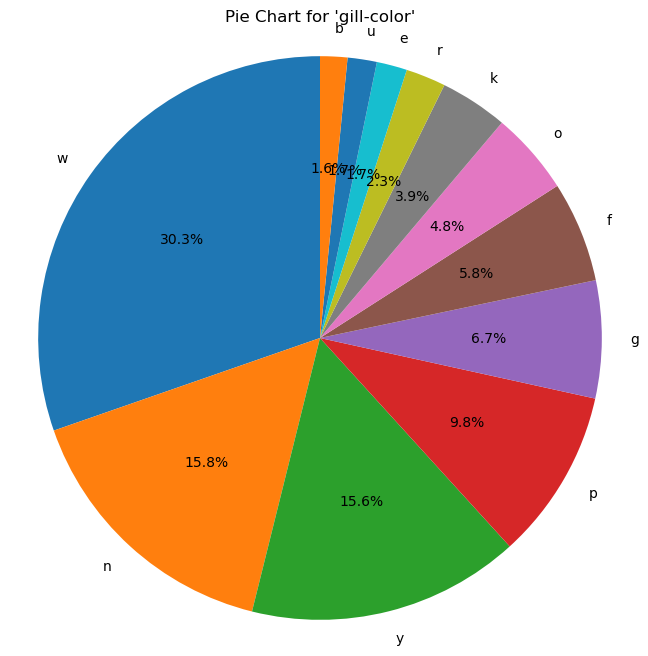

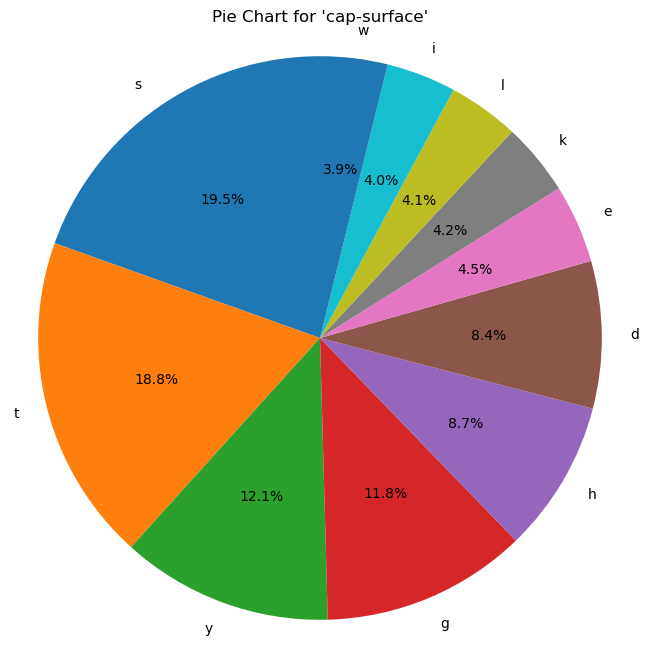

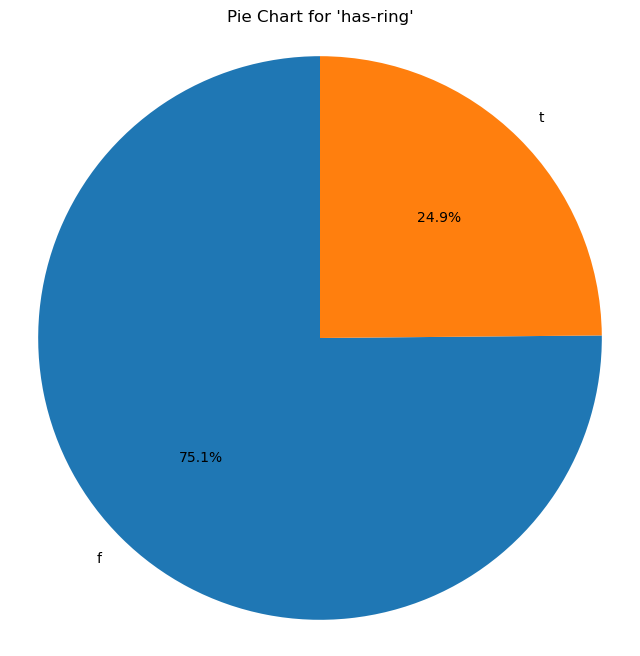

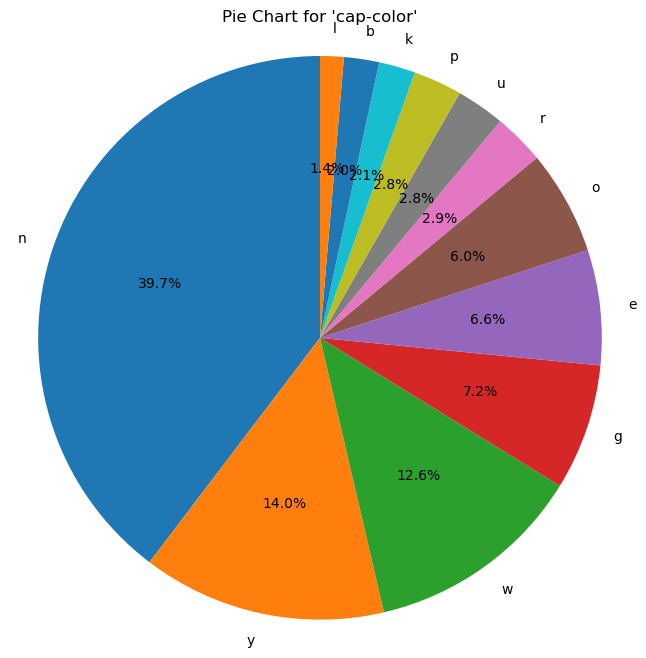

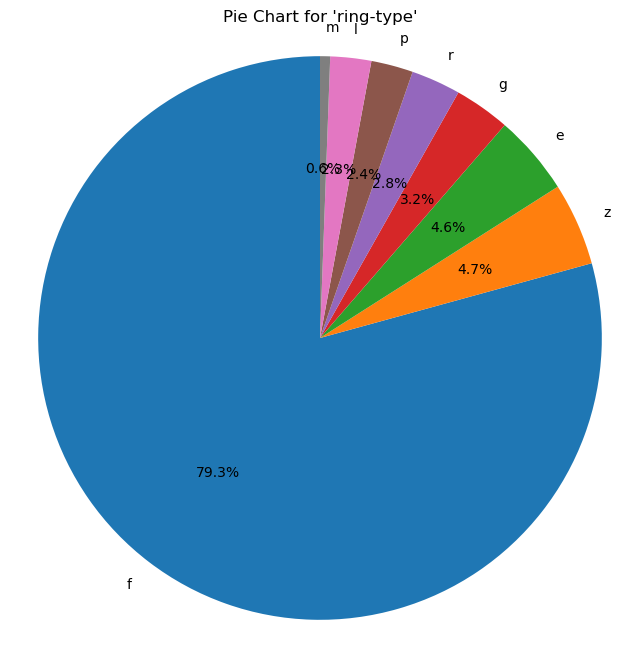

In [16]:
for i in discrete_cols:
    plot_pie_chart(df_no_encoded, i)

Can be used to comment on the separability of the data

In [53]:
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(df_encoded)

In [54]:
print(tsne_results.shape)
print(len(df_class))

(61069, 2)
61069


In [55]:
df_class = df_class.iloc[:, 0]  # Assuming the class values are in the first column

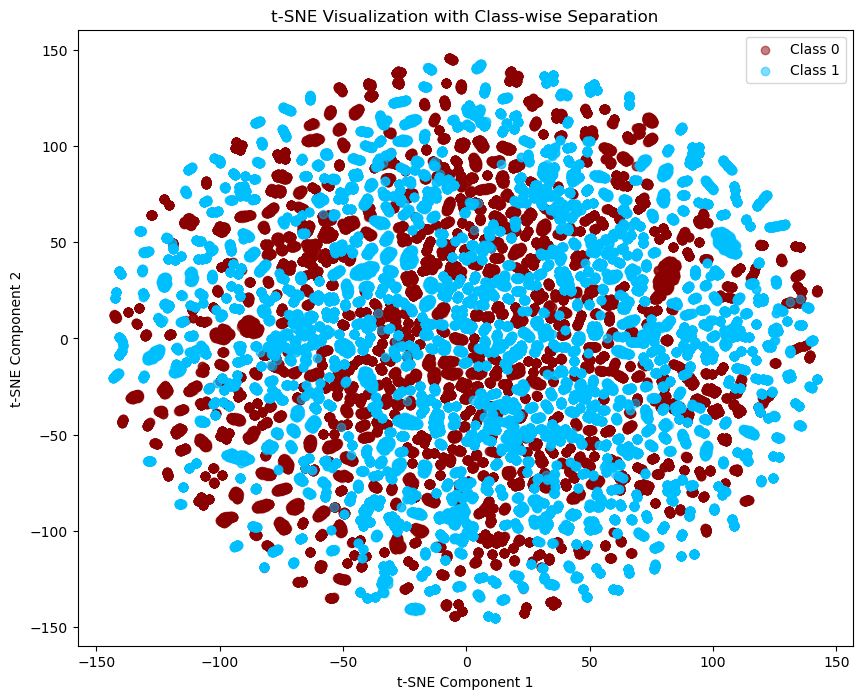

In [57]:
plt.figure(figsize=(10, 8))

# Filter rows based on the class labels in df_class
tsne_class_0 = tsne_results[df_class == 0]
tsne_class_1 = tsne_results[df_class == 1]

# Plotting class 0
plt.scatter(tsne_class_0[:, 0], tsne_class_0[:, 1], c='darkred', label='Class 0', alpha=0.5)

# Plotting class 1
plt.scatter(tsne_class_1[:, 0], tsne_class_1[:, 1], c='deepskyblue', label='Class 1', alpha=0.5)

plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.title('t-SNE Visualization with Class-wise Separation')
plt.show()


Classwise for all Discrte Columns

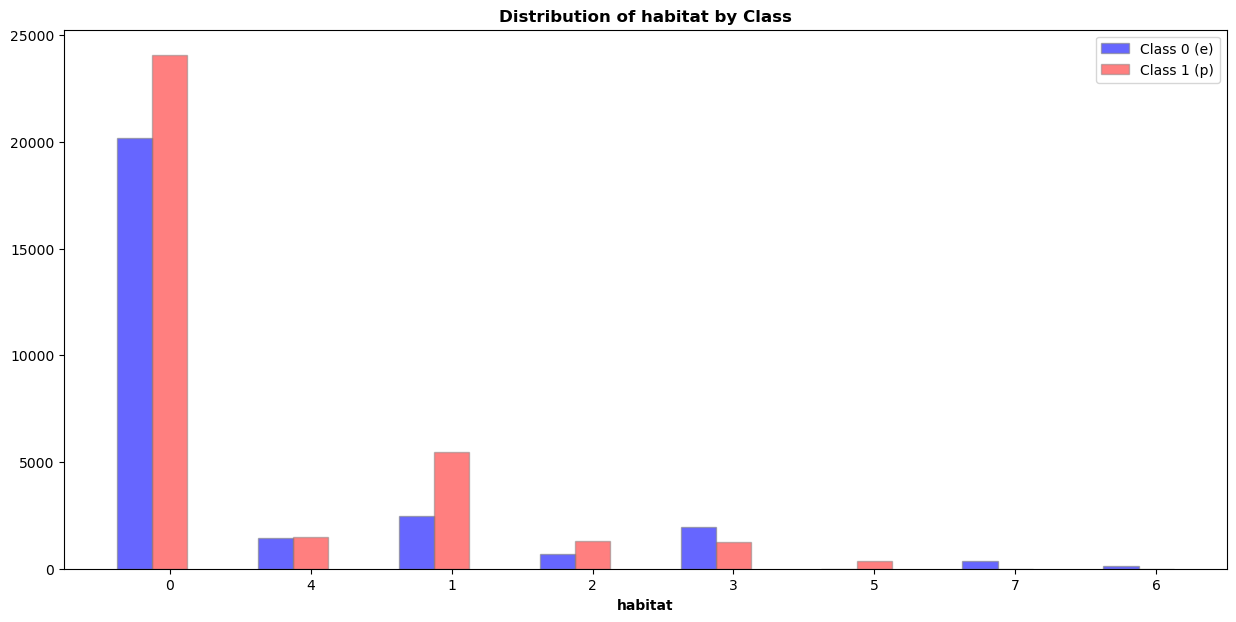

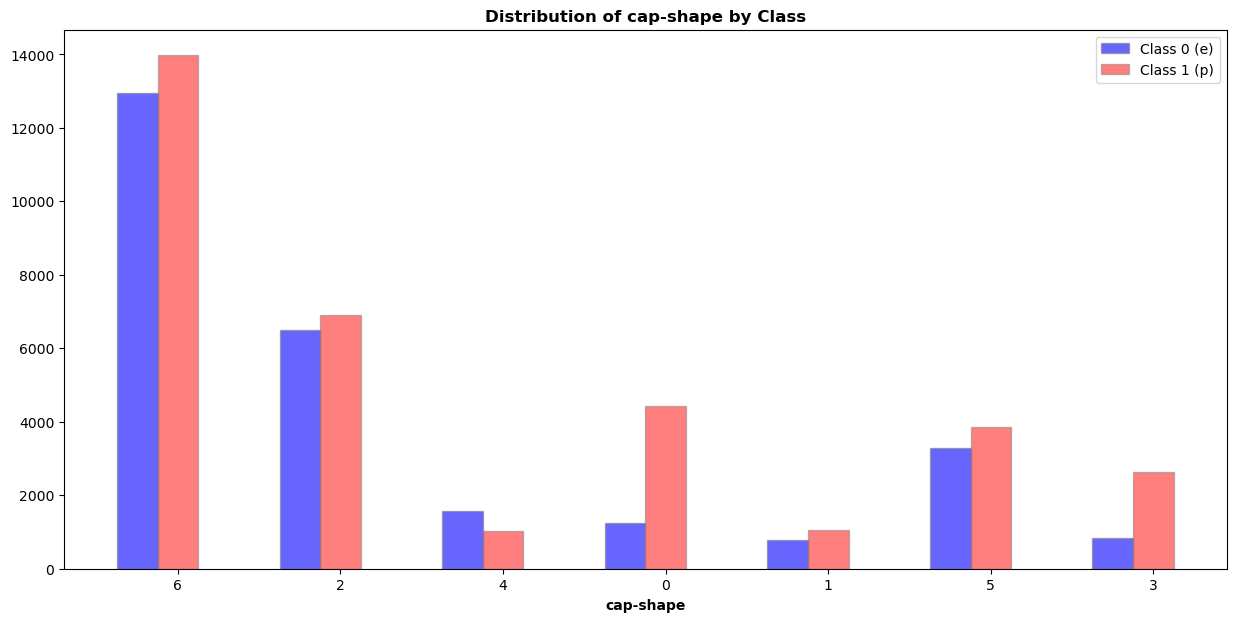

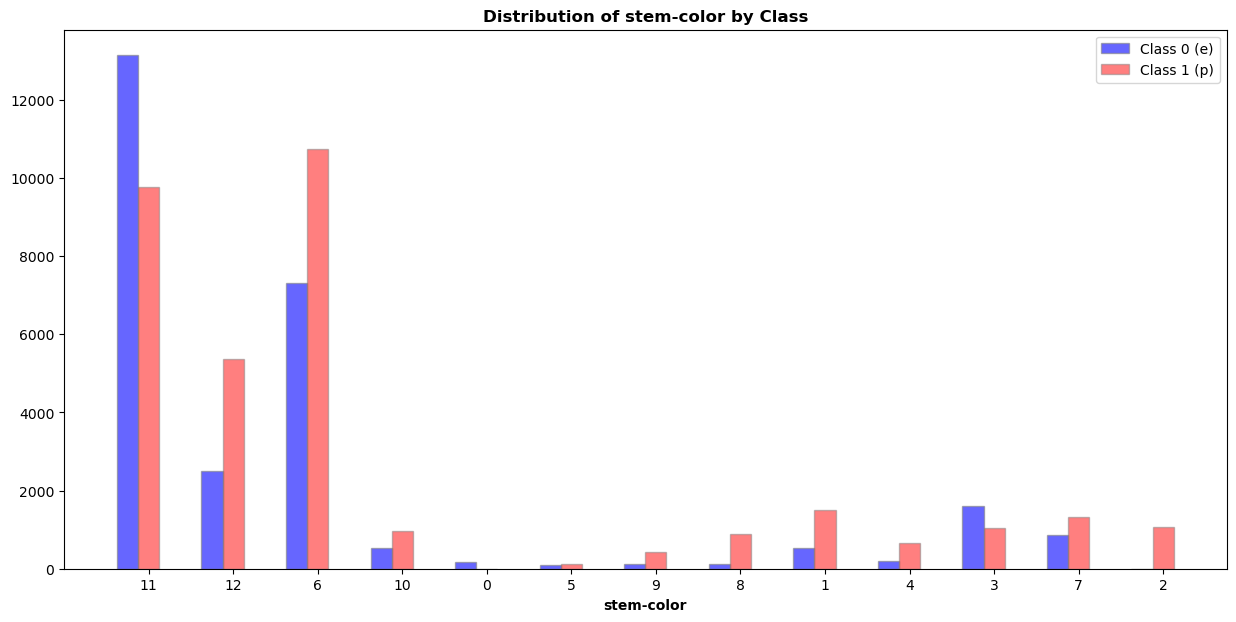

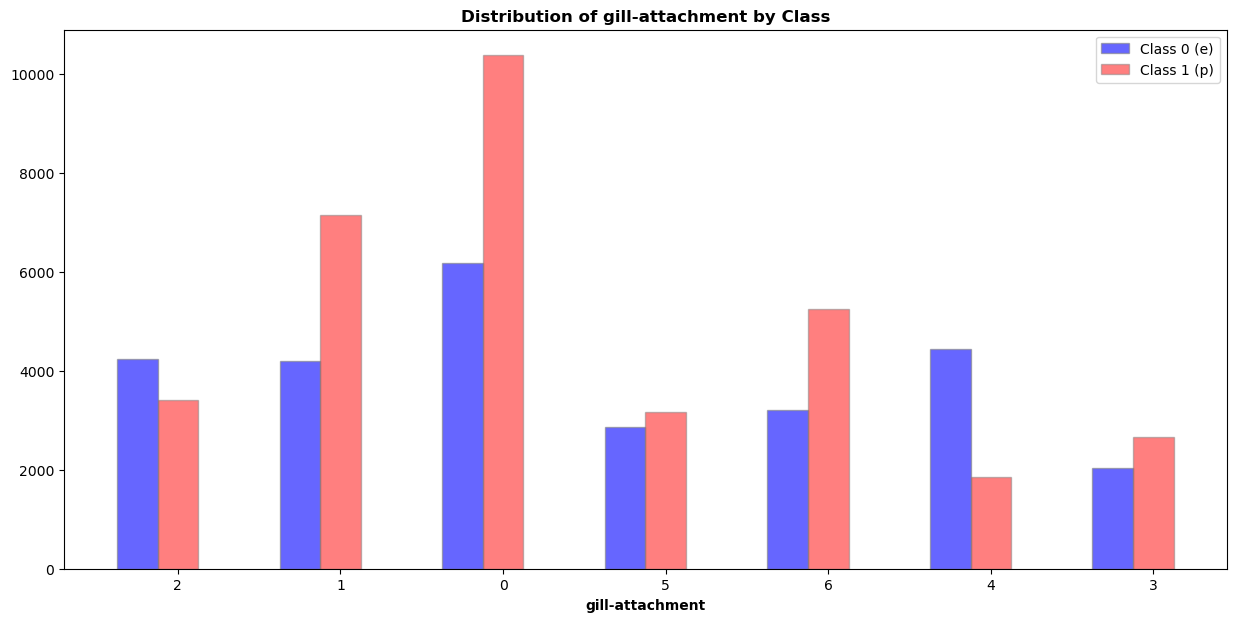

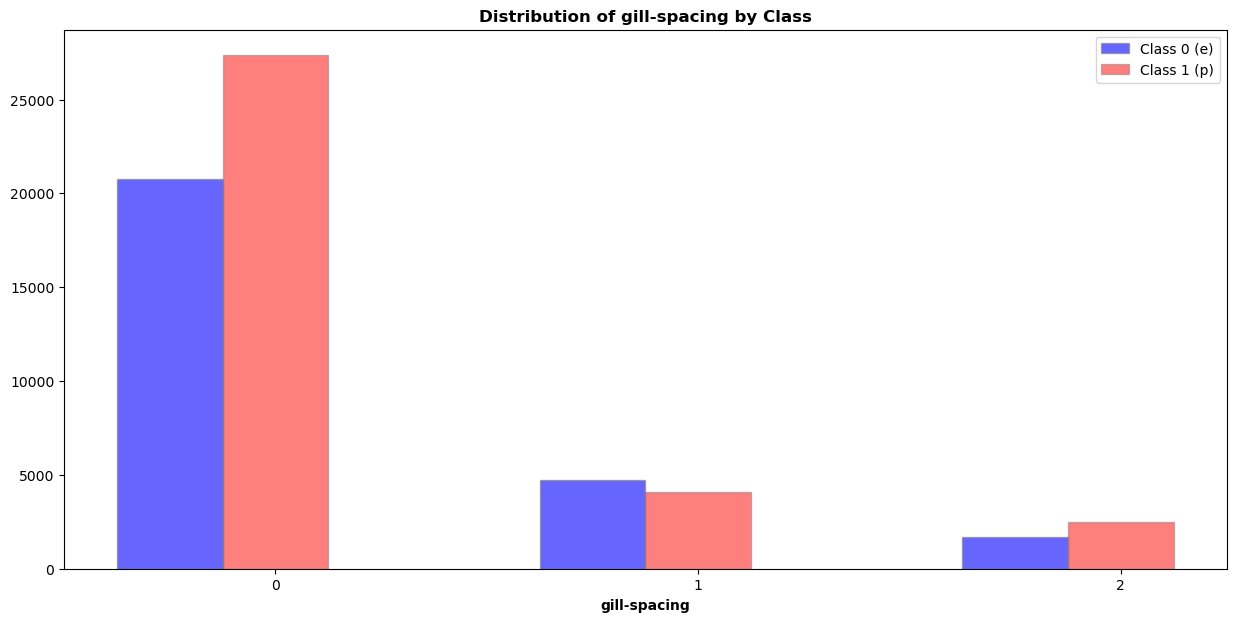

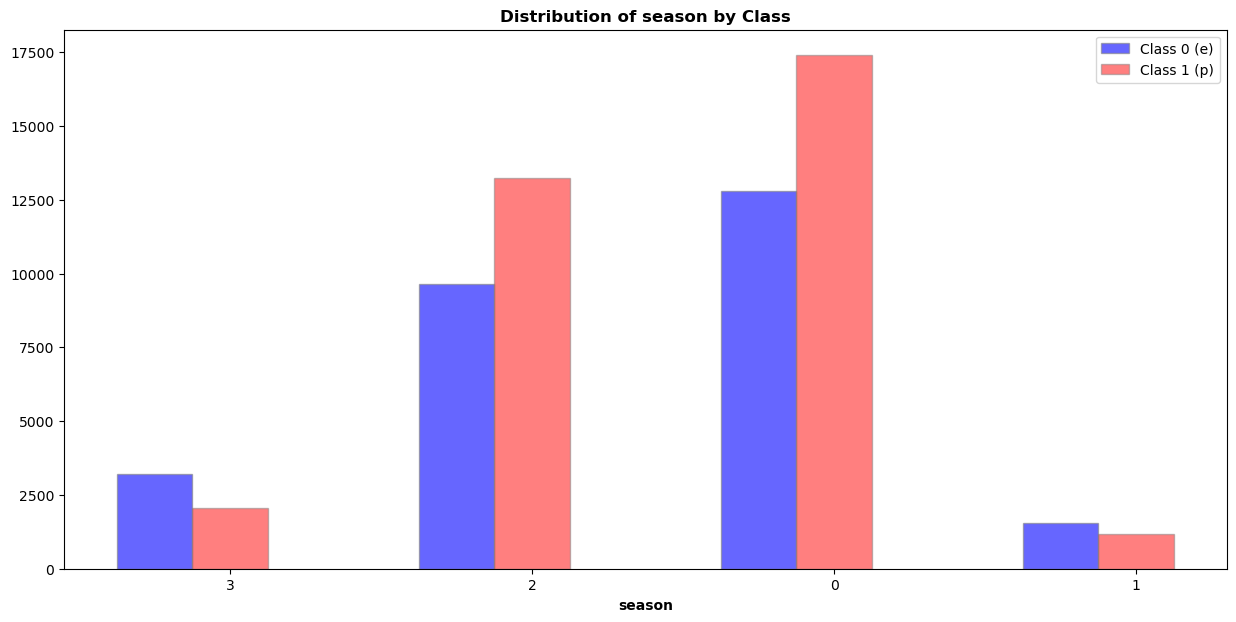

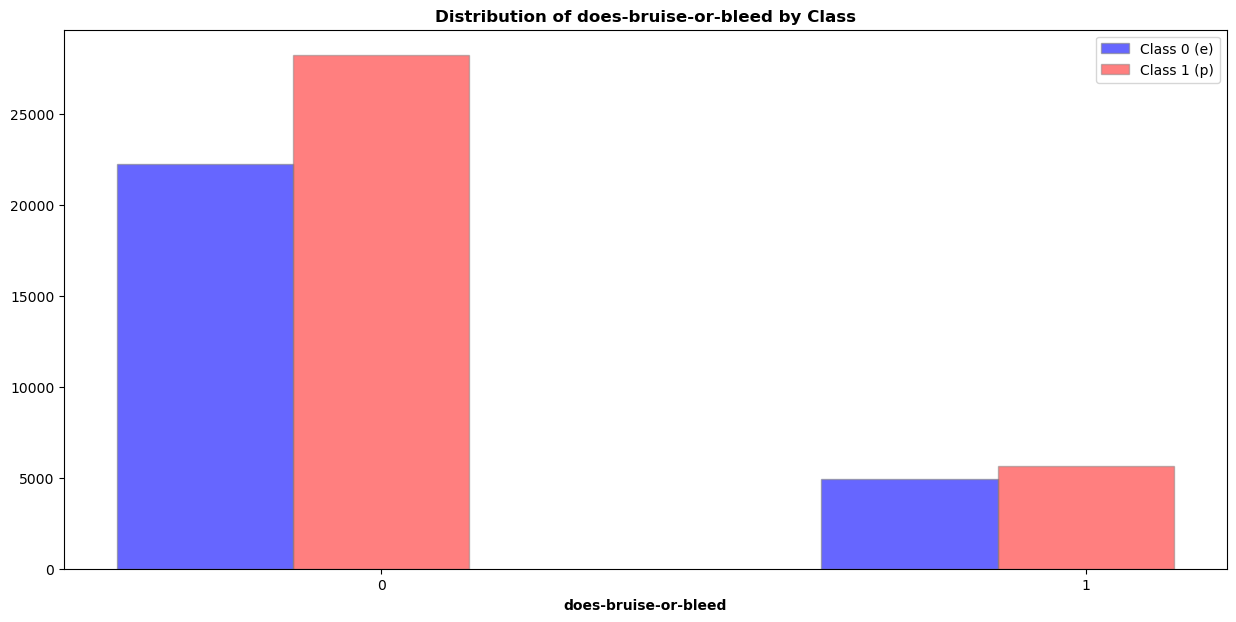

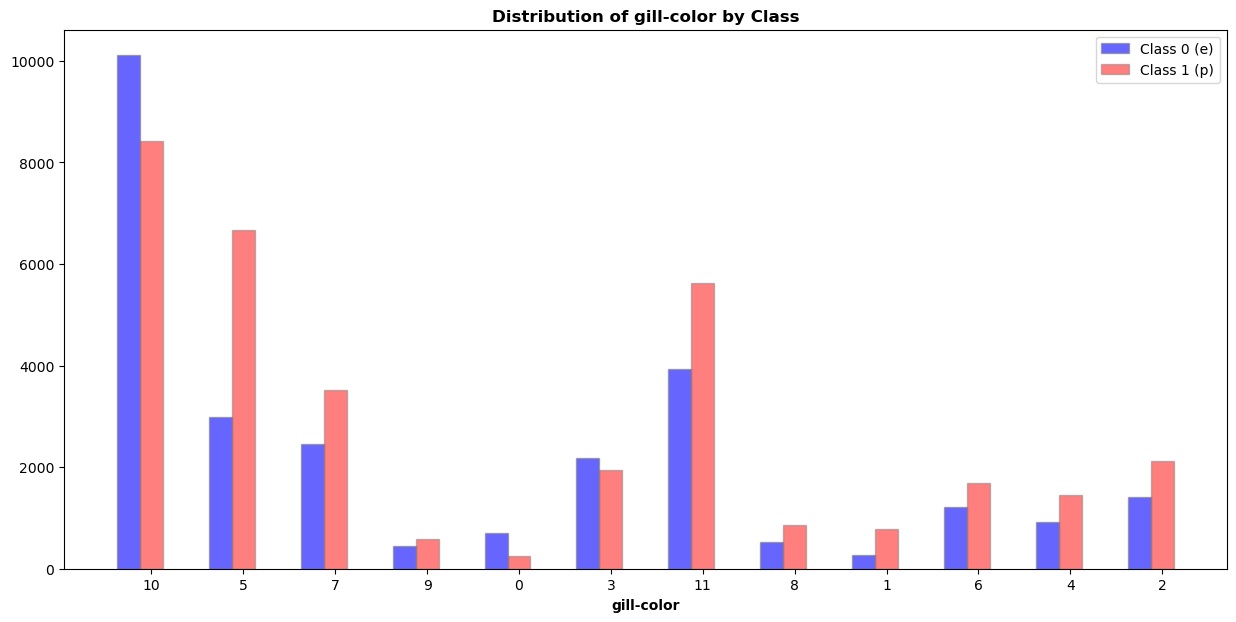

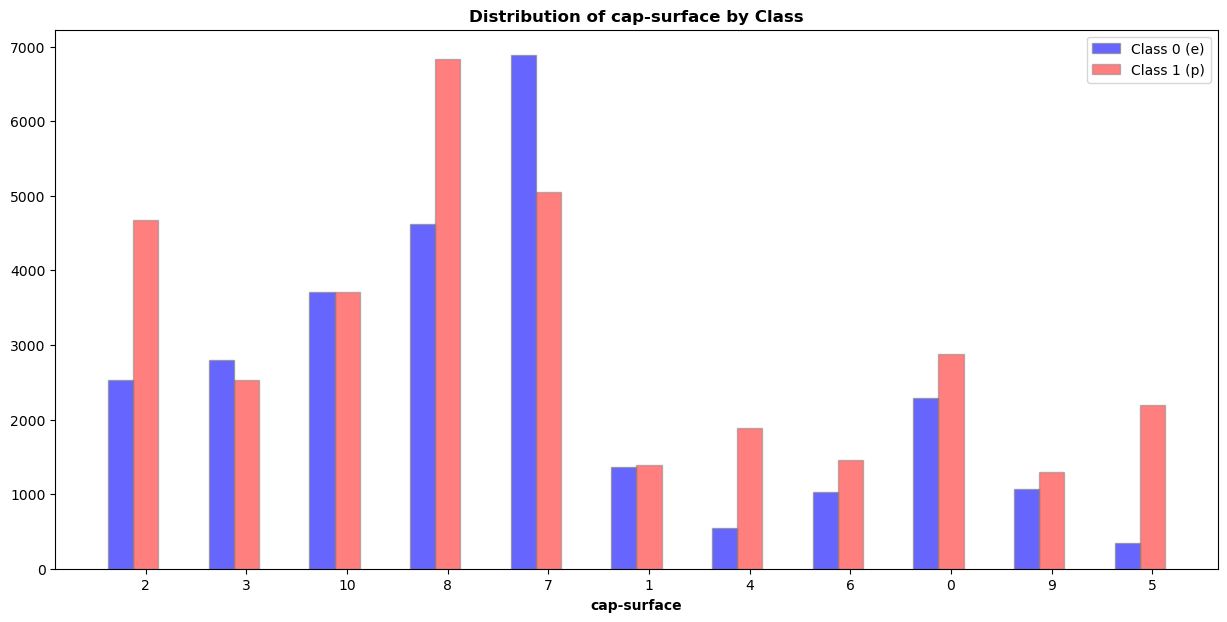

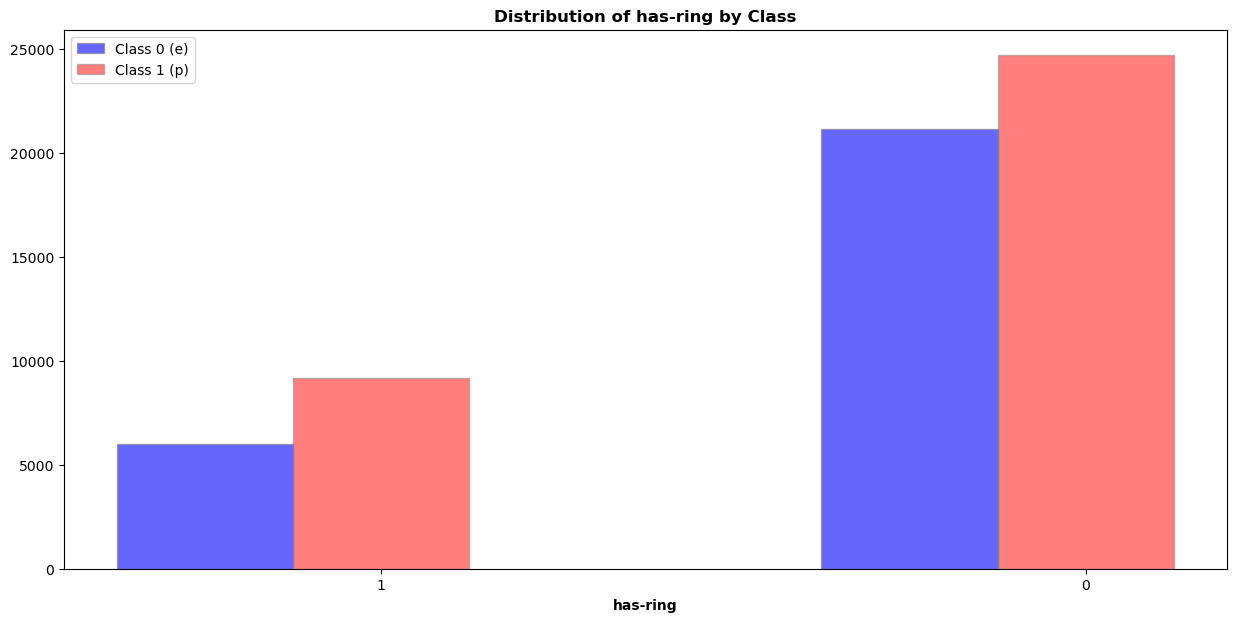

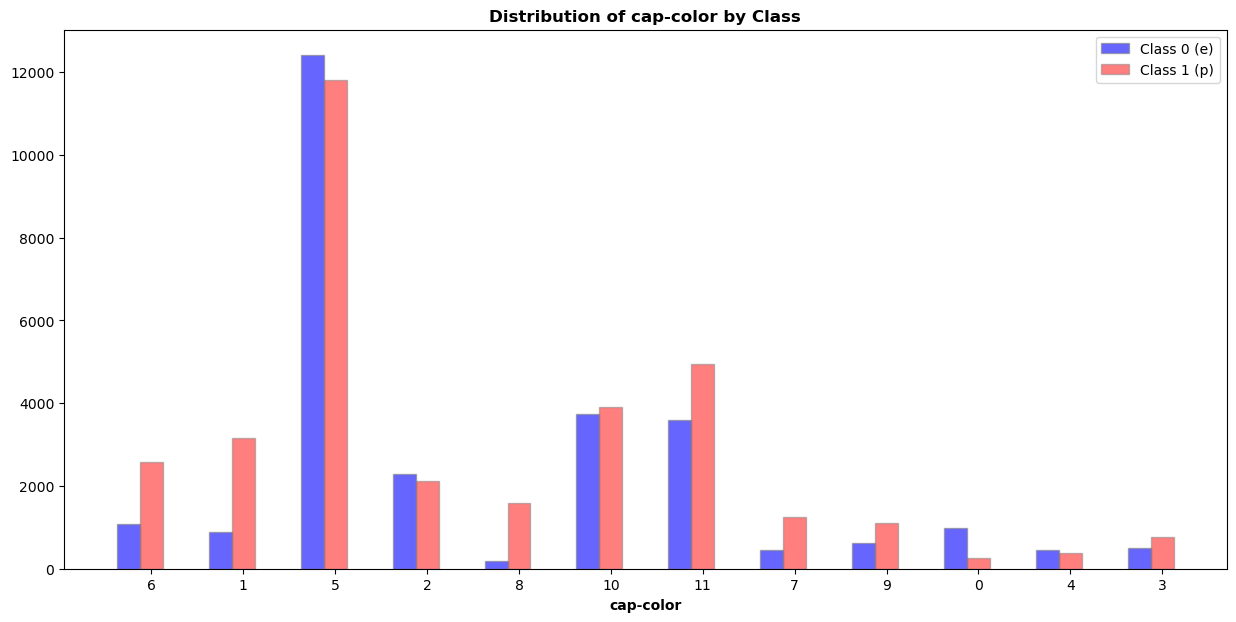

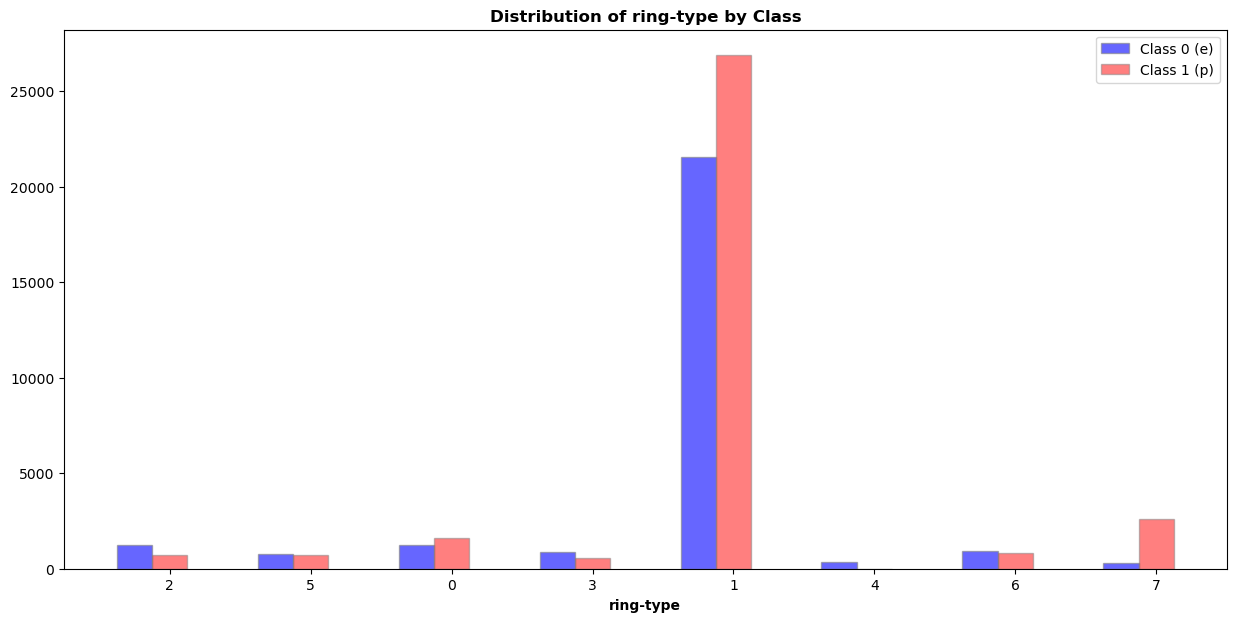

In [76]:
# Extracting the class values as a numpy array for boolean indexing
class_values = df_class

# Iterate over each column in df_encoded
for col in discrete_cols:

    # Extract unique values from the column
    unique_values = df_encoded[col].unique()

    # Count occurrences of each unique value for each class
    counts_class_0 = df_encoded[class_values == 0][col].value_counts().reindex(unique_values, fill_value=0)
    counts_class_1 = df_encoded[class_values == 1][col].value_counts().reindex(unique_values, fill_value=0)

    # Set bar width
    bar_width = 0.25

    # Set positions for the bars
    r1 = np.arange(len(unique_values))
    r2 = [x + bar_width for x in r1]

    # Plot bars
    plt.figure(figsize=(15, 7))
    plt.bar(r1, counts_class_0, alpha = 0.6, color='blue', width=bar_width, edgecolor='grey', label='Class 0 (e)')
    plt.bar(r2, counts_class_1, alpha = 0.5, color='red', width=bar_width, edgecolor='grey', label='Class 1 (p)')

    # Set title & subtitle
    plt.title(f'Distribution of {col} by Class', fontweight='bold')
    
    # Set x-axis label & ticks
    plt.xlabel(col, fontweight='bold')
    plt.xticks([r + bar_width for r in range(len(unique_values))], unique_values)

    # Include a legend
    plt.legend()
    plt.show()